This is an implementation by Sebastian Raschka.
As a practice exercise, I am trying to re-implement the algorithm.
Link: https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html

# Principal Component Analysis

Standardize the data.
Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix, or perform Singular Vector Decomposition.
Sort eigenvalues in descending order and choose the kk eigenvectors that correspond to the kk largest eigenvalues where kk is the number of dimensions of the new feature subspace (k≤dk≤d).
Construct the projection matrix WW from the selected kk eigenvectors.
Transform the original dataset XX via WW to obtain a kk-dimensional feature subspace YY.

Dataset : http://archive.ics.uci.edu/ml/datasets/Wine

In [1]:
import pandas as pd
wineDf = pd.read_csv(
    filepath_or_buffer='http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    header=None,
    sep=','
)


In [2]:
wineDf.columns = ['Label','Alcohol','Malic_acid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols'
                  ,'Proanthocyanins','Color_intensity','Hue','OD280/OD315','Proline']
wineDf.head(5)

,Label,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
X = wineDf.ix[:,1:14].values
y = wineDf.ix[:,0].values

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math

/Users/mathurtx/tensorflow/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [6]:
mean_vector = np.mean(X_std, axis=0)
#covariance = (X - mean(X))/number of rows
covariance_matrix = (X_std - mean_vector).T.dot(X_std - mean_vector)/(X_std.shape[0]-1)

In [7]:
numpy_covariance_matrix = np.cov(X_std.T)

In [8]:
print "Numpy covariance matrix :\n %s", numpy_covariance_matrix
print "\n Manual covariance matrix :\n %s", covariance_matrix

Numpy covariance matrix :
 %s [[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972
   0.86944804 -0.45247731  0.61587304 -0.05544792  0.43613151  0.70390388
   0.500

# # Find eigen vector and values now

In [9]:
eigen_values, eigen_vector = np.linalg.eig(covariance_matrix)
print('Eigenvectors \n%s' %eigen_vector)
print('\nEigenvalues \n%s' %eigen_values)

Eigenvectors 
[[-0.1443294  -0.48365155  0.20738262 -0.0178563   0.26566365 -0.21353865
  -0.05639636  0.01496997 -0.39613926  0.26628645  0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758 -0.22493093 -0.08901289  0.53689028 -0.03521363 -0.53681385
   0.42052391  0.02596375 -0.06582674 -0.12169604 -0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106 -0.31606881 -0.6262239  -0.21417556  0.14302547 -0.15447466
  -0.14917061 -0.14121803  0.17026002  0.04962237 -0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041  0.0105905  -0.61208035  0.06085941 -0.06610294  0.10082451
  -0.28696914  0.09168285 -0.42797018  0.05574287  0.20044931  0.47931378
   0.05279942]
 [-0.14199204 -0.299634   -0.13075693 -0.35179658 -0.72704851 -0.03814394
   0.3228833   0.05677422  0.15636143 -0.06222011  0.27140257  0.07128891
   0.06787022]
 [-0.39466085 -0.06503951 -0.14617896  0.19806835  0.14931841  0.0841223
  -0.02792498 -0.46390791  0.40593409  0.30388245  0.28603452  0.30434119
  -0.32013135]
 [-0.4229

In [10]:
#Applying SVD

In [11]:
u,s,v = np.linalg.svd(X_std.T)

In [12]:
for ev in eigen_vector:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [13]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vector[:,i]) for i in range(len(eigen_vector))]
eigen_pairs.sort(key=lambda x: -x[0])

In [14]:
eigen_pairs

[(4.7324369775835917,
  array([-0.1443294 ,  0.24518758,  0.00205106,  0.23932041, -0.14199204,
         -0.39466085, -0.4229343 ,  0.2985331 , -0.31342949,  0.0886167 ,
         -0.29671456, -0.37616741, -0.28675223])),
 (2.5110809296451242,
  array([-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
         -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
          0.27923515,  0.16449619, -0.36490283])),
 (1.4542418678464655,
  array([ 0.20738262, -0.08901289, -0.6262239 , -0.61208035, -0.13075693,
         -0.14617896, -0.1506819 , -0.17036816, -0.14945431,  0.13730621,
         -0.08522192, -0.16600459,  0.12674592])),
 (0.92416586682487456,
  array([-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
          0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
         -0.42777141,  0.18412074, -0.23207086])),
 (0.85804867653711114,
  array([ 0.26566365, -0.03521363,  0.14302547, -0.06610294, -0.72704851,
          0.149318

In [15]:
#To decide how many principal components we need we calculate the explained variance

In [16]:
eigen_total = sum(eigen_values)
var_exp = [(i / eigen_total)*100 for i in sorted(eigen_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

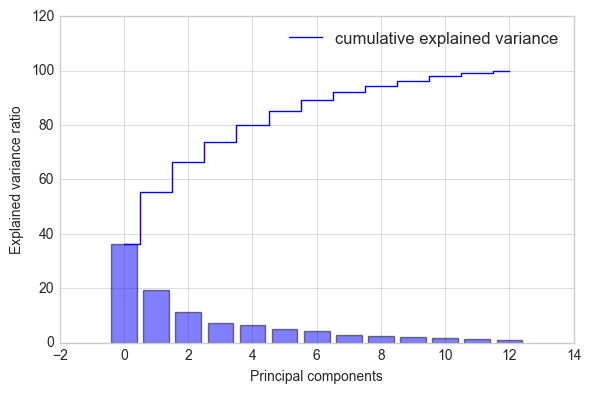

In [17]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(len(eigen_values)), var_exp, alpha=0.5, align='center')
    plt.step(range(len(eigen_values)), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [18]:
#Projection matrix construction

In [19]:
matrix_w = np.hstack((eigen_pairs[0][1].reshape(eigen_pairs[0][1].shape[0],1),
                      eigen_pairs[1][1].reshape(eigen_pairs[0][1].shape[0],1),
                      eigen_pairs[2][1].reshape(eigen_pairs[0][1].shape[0],1),
                      eigen_pairs[3][1].reshape(eigen_pairs[0][1].shape[0],1),
                     ))

In [20]:
matrix_w

array([[-0.1443294 , -0.48365155,  0.20738262, -0.0178563 ],
       [ 0.24518758, -0.22493093, -0.08901289,  0.53689028],
       [ 0.00205106, -0.31606881, -0.6262239 , -0.21417556],
       [ 0.23932041,  0.0105905 , -0.61208035,  0.06085941],
       [-0.14199204, -0.299634  , -0.13075693, -0.35179658],
       [-0.39466085, -0.06503951, -0.14617896,  0.19806835],
       [-0.4229343 ,  0.00335981, -0.1506819 ,  0.15229479],
       [ 0.2985331 , -0.02877949, -0.17036816, -0.20330102],
       [-0.31342949, -0.03930172, -0.14945431,  0.39905653],
       [ 0.0886167 , -0.52999567,  0.13730621,  0.06592568],
       [-0.29671456,  0.27923515, -0.08522192, -0.42777141],
       [-0.37616741,  0.16449619, -0.16600459,  0.18412074],
       [-0.28675223, -0.36490283,  0.12674592, -0.23207086]])

In [22]:
Y = X_std.dot(matrix_w)

In [23]:
print "Transformed Data \n, %s", Y 

Transformed Data 
, %s [[ -3.31675081e+00  -1.44346263e+00   1.65739045e-01  -2.15631188e-01]
 [ -2.20946492e+00   3.33392887e-01   2.02645737e+00  -2.91358318e-01]
 [ -2.51674015e+00  -1.03115130e+00  -9.82818670e-01   7.24902309e-01]
 [ -3.75706561e+00  -2.75637191e+00   1.76191842e-01   5.67983308e-01]
 [ -1.00890849e+00  -8.69830821e-01  -2.02668822e+00  -4.09765788e-01]
 [ -3.05025392e+00  -2.12240111e+00   6.29395827e-01  -5.15637495e-01]
 [ -2.44908967e+00  -1.17485013e+00   9.77094891e-01  -6.58305046e-02]
 [ -2.05943687e+00  -1.60896307e+00  -1.46281883e-01  -1.19260801e+00]
 [ -2.51087430e+00  -9.18070957e-01   1.77096903e+00   5.62703612e-02]
 [ -2.75362819e+00  -7.89437674e-01   9.84247490e-01   3.49381568e-01]
 [ -3.47973668e+00  -1.30233324e+00   4.22735217e-01   2.68417600e-02]
 [ -1.75475290e+00  -6.11977229e-01   1.19087832e+00  -8.90164338e-01]
 [ -2.11346234e+00  -6.75706339e-01   8.65086426e-01  -3.56438010e-01]
 [ -3.45815682e+00  -1.13062988e+00   1.20427635e+00  